# Métodos de Kernel

Supongamos que tenemos $x,z \in \mathbb{R}^n$ y queremos:

1. Transformarlos en $\phi(x)$, $\phi(y)$, con la transformación $\phi : \mathbb{R}^n \rightarrow \mathbb{R}^p$, donde normalmente $p >> n$
2. Realizar el producto punto en ese nuevo espacio: $\langle \phi(x) ,  \phi(y)\rangle $

Para ciertas transformaciones podemos encontrar funciones que, desde dos datos originales $\in \mathbb{R}^n$, nos dan directamente su producto punto en el espacio de la transformación: $\langle \phi(x) ,  \phi(y)\rangle $. 

Por ejemplo, la función $K_f(u,v)=\langle u,v \rangle ^2$ con $u,v \in \mathbb{R}^2$ nos da directamente el producto punto $\langle \phi(x) ,  \phi(y)\rangle$ con $\phi(u)=[(u_1)^2, \sqrt{2}u_1 u_2, (u_2)^2]$, es decir $\phi(u): \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Podemos comprobar esto:

$$\begin{split}
K_f(u,v)&=\langle u,v \rangle ^2\\
 &=(u_1 v_1 + u_2 v_2)^2\\
 &= u_1^2 v_1^2 + 2 u_1 v_1 u_2 v_2 + u_2^2 v_2^2\\
 &=\langle [u_1^2, \sqrt{2}u_1u_2, u_2^2], [v_1^2, \sqrt{2}v_1v_2, v_2^2] \rangle\\
 &=\langle \phi(u) ,  \phi(v)\rangle
\end{split}$$

observa que usando $K_f(u,v)$ tenemos directamente el producto punto de $u$ y $v$ **depués** de haberlos transformado por $\phi$, sin necesidad de hacer esa transformación **explícitamente**.

con esto en **CUALQUIER ALGORITMO** que dependa únicamente del producto punto entre los datos puede sustituir $\langle u, v\rangle$ por $K_f(u,v)$ y estará operando directamente en el espacio definido implícitamente por el $\phi$ asociado esa función.

La función $K_f(u,v)$ es denominada la **función de kernel** y este método el **kernel trick**.

Dos ejemplos:

- el kernel $K_f(u,v)=(\langle u,v \rangle+1)^d$, es el kernel polinomial y, si $d=2$ equivale a una transformación $\mathbb{R}^2 \rightarrow \mathbb{R}^6$ con $\phi=[u_1^2, u_2^2, \sqrt{2}u_1, \sqrt{2}u_2, \sqrt{2}u_1u_2, 1]$
- el kernel $K_f(u,v)=\gamma e^{-\gamma ||u-v||^2}$ es el kernel gaussiano (o de función radial) es equivalente a realizar el producto punto en un espacio de infinitas dimensiones (en el que cada dato es una función). El parámetro $\gamma$ regula cuan cerca han de estar dos puntos en el espacio original para ser considerados similares.

Obseva que no cualquier funcion es una función de kernel válida, cualquier función $K_f$ tiene que equivaler al producto punto en el espacio generado por algún $\phi$ al que está asociado. Es decir, $K_f(u,v) = \langle \phi(u) ,  \phi(v)\rangle$

## Support Vector Machines

Una SVM es un **clasificador lineal** que busca la separación con mayor margen, a diferencia de la regresión logística, que también es un clasificador lineal pero que únicamente busca separar las clases. En el ejemplo siguiente una SVM buscaría el separador A, mientras que para la regresión logística ambos separadores serían óptimos.


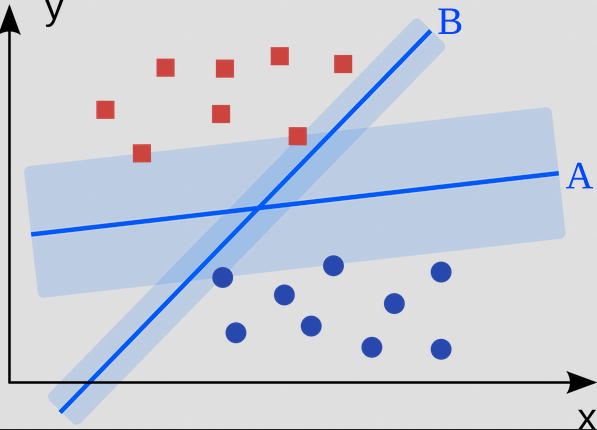

In [4]:
from IPython.display import Image
Image(filename='imgs/margins.png', width=400)


Consulta [esta referencia](http://cs229.stanford.edu/notes/cs229-notes3.pdf) para mayor detalle sobre la formulación matemática de las SVMs.

Dado un problema de clasificación, con un dataset $X =  \{ (x^{(0)}, y^{(0)})  , ( x^{(1)}, y^{(1)})  , ...,  (x^{(m-1)}, y^{(m-1)}) \}$, teniendo $x^{(i)} \in \mathbb{R}^n, y^{(i)} \in [-1,1]$, una SVM encuentra el **separador lineal** entre dos clases con mayor margen. Esto se formula como un problema de optimización. Dados los parámetros $w$ y $b$ de un hiperplano separador, la distancia de un punto $x^{(i)}$ a dicho hiperplano viene dada por:

$$\gamma^{(i)} = y^{(i)}\bigg(\Big(\frac{w}{||w||}\Big)^T x^{(i)}+\frac{b}{||w||} \bigg)$$

el punto más cercano al margen es:

$$\gamma=\text{min}\;\gamma^{(i)}$$

y queremos maximixar la distancia del punto más cercano:

$$\begin{split}
\text{argmax}_{w,b} \;\;\; & \gamma\\
s.t. \;\;\;&  y^{(i)}(w^Tx^{(i)}+b) \geq \gamma, \;\; i=0,..,m-1\\
& ||w||=1
\end{split}$$



Esto es un problema de optimización no convexo. Usando el método de los clasificadores de Lagrange, la formulación final del problema de optimización asociado es la siguiente:


$$\begin{split}
\text{max}(\alpha) \;\;& W(\alpha)=\sum_{i=0}^{m-1}\alpha_i - \frac{1}{2}\sum_{i,j=0}^{m-1}\alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle\\
s.t. \;\; & \alpha_i \geq 0, i=0,..,m-1\\
&\sum_{i=0}^{m-1}\alpha_i y^{(i)}=0
\end{split}$$

observa:
- como el algoritmo usa únicamente el producto punto entre sus elementos. Por tanto, podemos sustutir $\langle x^{(i)}, x^{(i)} \rangle$ por cualquier función $K_f(x^{(i)}, x^{(i)} )$ válida.
- cada elemento $x^{(i)}$ tiene asociado un coeficiente $\alpha_i$, sólamente para unos pocos elementos $\alpha_i \neq 0$. Precisamente estos son los vectores de soporte.
- no nos sirven los métodos tradicionales basados en gradientes. Para resolver el problema de optimización basado en coeficientes se usa el SMO (Sequential Minimal Optimization).

In [1]:
from sklearn.datasets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2Ddata_with_boundary(predict,X,y):
    n = 200
    mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
    mins -= np.abs(mins)*.2
    maxs += np.abs(maxs)*.2
    d0 = np.linspace(mins[0], maxs[0],n)
    d1 = np.linspace(mins[1], maxs[1],n)
    gd0,gd1 = np.meshgrid(d0,d1)
    D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
    p = (predict(D)*1.).reshape((n,n))
    plt.contourf(gd0,gd1,p, levels=[-0.1,0.5], alpha=0.5, cmap=plt.cm.Greys)
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red")

ejecuta varias veces la siguiente celda y observa la diferencia en la frontera de clasificación. Prueba:

- con los datasets sintéticos `make_moons` y `make_blos` tal cual están configurados
- con distintos valores de $\gamma$ en el tercer SVM. Prueba con 0.1 para `make_blobs` y con 10 para `make_moons`

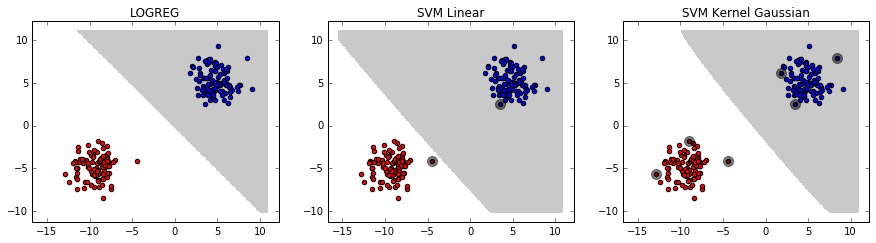

In [8]:
X,y = make_blobs(200, centers=2, cluster_std=1.5)
#X,y = make_moons(400, noise=.1)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(131)
ax.set_aspect("equal")
lr = LogisticRegression()
lr.fit(X,y)
plot_2Ddata_with_boundary(lr.predict, X,y)
plt.title("LOGREG")
ax = fig.add_subplot(132)
svc = SVC(kernel="poly", degree=5)
svc.fit(X,y)
plot_2Ddata_with_boundary(svc.predict, X,y)
plt.title("SVM Linear")
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=100, alpha=0.5, color="black")
ax.set_aspect("equal")

ax = fig.add_subplot(133)
svc = SVC(kernel="rbf", gamma=.01)
svc.fit(X,y)
plot_2Ddata_with_boundary(svc.predict, X,y)
plt.title("SVM Kernel Gaussian")
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s=100, alpha=0.5, color="black")
ax.set_aspect("equal")


## Regresión

Usaremos el problema de regresión para ilustrar el uso kernels ya que es relativamente sencillo de formular.

### Entrenamiento

Dado un dataset $X =  \{ (x^{(0)}, y^{(0)})  , ( x^{(1)}, y^{(1)})  , ...,  (x^{(m-1)}, y^{(m-1)}) \}$   con $x^{(i)} \in \mathbb{R}^n, y^{(i)} \in \mathbb{R}$, la matriz $\mathbf{X}$ recoge todos los $x^{(i)}$ y el vector $\mathbf{y}$ todos los $y^{(i)}$, de forma que $X \in \mathbb{R}^{m \times n}$, $y \in \mathbb{R}^m$.

La regresión lineal obtiene parámetros $w \in \mathbb{R}^n$ de forma que para cada $x^{(i)}$ estimamos $y^{(i)}$ como $y^{(i)} =  \langle w, x^{(i)}\rangle  = w^T x^{(i)}$, el producto punto entre $w$ y $x^{(i)}$. El error cuadrado que obtenemos al hacer esta predición es $\big( y^{(i)} − w^T x^{(i)}\big)^2$ y
queremos los parámetros w de modo que:

$$arg\;min_w ||\mathbf{y}-\mathbf{X}w||^2$$

es decir, que minimizan el error cuadrático agregado en la predicción de todos los elementos del dataset. Derivando e igualando a cero, obtenemos que la siguiente expresión para $w$ resuelve el problema de optimización:

$$w=\big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}$$

observa que calcular el valor de esta expresión conlleva una complejidad computacional $\mathcal{O}(n^3)$ ya que $\mathbf{X}^T \mathbf{X} \in \mathbb{R}^{n \times n}$ y la inversión de una matriz de $n \times n$ implica realizar del orden de $n^3$ operaciones.
Si queremos añadir un parámetro de regularización para evitar casos de overtting, nuestro problema de optimización se convierte en

$$arg\;min_w ||\mathbf{y}-\mathbf{X}w||^2+\lambda||w||^2$$

y derivando e igualando a cero, obtenemos la siguiente expresión para $w$:

$$w=\big(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I}_n\big)^{-1}\mathbf{X}^T\mathbf{y}$$


que conlleva igualmente una complejidad computacional $\mathcal{O}(n^3)$. Esta es la **forma primaria** de la solución del problema de regresión con regularización. Recuerda que $\mathbf{I}_n$ es la matriz identidad $\in \mathbb{R}^{n\times n}$ con unos en su diagonal y ceros en el resto de posiciones. Además, con $\lambda > 0$ se garantiza que la operación de inversión de matrix en la ecuación siempre es posible. Reorganizando la expresión podemos expresar w también de la siguiente manera:

$$w=\mathbf{y}^T\big(\mathbf{X}\mathbf{X}^T+\mathbf{I}_m\big)^{-1}\mathbf{X}$$


Esta es la **forma dual** del problema, donde ahora la complejidad computacional es de $\mathcal{O}(m^3)$ ya que $\mathbf{X}\mathbf{X}^T \in \mathbb{R}^{m\times m}$ e $\mathbf{I}_m$ es la matriz identidad $\in \mathbb{R}^{m\times m}$. Si definimos $\mathbf{K} = \mathbf{X}\mathbf{X}^T \in \mathbb{R}^{m \times m}$ y $\mathbf{K}_{\mathbf{I}} = (λ\mathbf{I}_m + \mathbf{K})^{−1} \in \mathbb{R}^{m\times m}$ entonces $w = \mathbf{y}^T \mathbf{K}_{\mathbf{I}} \mathbf{X}$. Observa que $\mathbf{K}_{i,j} =  \langle x^{(i)}, x^{(j)} \rangle$ , es decir, que está compuesta
por los productos punto entre todos los datos.

Por tanto, si tenemos una función de kernel $K_f$, podemos sustituir la matriz $\mathbf{K}$ por $\mathbf{K}^f$ en la que $\mathbf{K}^f_{i,j}=K_f(x^{(i)}, x^{(j)})$

### Predicción

Dado un nuevo $x \in \mathbb{R}^n$ nuestra predicción siempre viene dada por $\hat{y} = \langle w, x \rangle = w^T x$; en el caso de la forma dual que acabamos de ver podemos usar el hecho de que $w = \mathbf{y}^T \mathbf{K}_{\mathbf{I}} \mathbf{X}$ y obtener la siguiente expresión para $\hat{y}$

$$\hat{y}=\langle w,x \rangle = \mathbf{y}^T \mathbf{K}_{\mathbf{I}} \mathbf{X}x$$

De nimos $\mathbf{Z} = \mathbf{X}x \in  \mathbb{R}^{m \times 1}$, es decir, el producto punto de $x$ con todos los elementos del dataset con lo que $\hat{y} = \mathbf{y}^T\mathbf{K}_{\mathbf{I}}\mathbf{Z}$. De esta manera, en vez de calcular (y almacenar) explícitamente $w$ en el proceso de entrenamiento o ajuste de parámetros, calculamos (y almacenamos) $\mathbf{K}_{\mathbf{I}}$. Así, cada vez que tenemos un nuevo dato, $x$, para calcular $\hat{y} lo que hacemos es:

1. Calular $\mathbf{Z}$
2. Tomar $\mathbf{K}_{\mathbf{I}}$ y $\mathbf{y}^T$ según los almacenamos después del proceso de entrenamiento
3. Calcular $\hat{y}=\mathbf{y}^T\mathbf{K}_{\mathbf{I}}\mathbf{Z}$

Ahora, asumiendo que $\mathbf{K}_{\mathbf{I}}$ está previamente calculada, la complejidad computacional de calcular $\hat{y}$ para un nuevo punto es de $\mathcal{O}(mn)$. En cambio, usando direcamente el producto punto $\langle<w,x⟩\rangle$ es únicamente $\mathcal{O}(n)$. Además $\mathbf{K}_{\mathbf{I}}$ es en general mucho más grande que $w$ para almacenar. La ventaja es que ahora todos nuestros cómputos están basados únicamente en operaciones producto punto entre los elementos del dataset, tanto para calcular $\mathbf{K}$ como para calcular $\mathbf{Z}$ y como veremos más abajo esto nos permitirá hacer otras cosas. Aparte de esto, el uso de esta técnica en problemas de regresión es computacionalmente ventajosa cuando $n \geq m$, es decir, cuando tenemos considerablemente más columnas que elementos en el dataset (como por ejemplo en ciertos problemas de bioinformática).

En resumen

|   | formulación primaria  | formulación dual   |  
|---|---|---|
| predicción para $x$ | $\langle w,x \rangle$ | $\mathbf{y}^T \mathbf{K}_{\mathbf{I}} \mathbf{X}x$|
|$\mathcal{O}$ train |  $\mathcal{O}(n^3)$ | $\mathcal{O}(m^3)$   |
| $\mathcal{O}$ predicción  | $\mathcal{O}(n)$  | $\mathcal{O}(mn)$  |
|almacena   | $w \in \mathbb{R}^n$  | $\mathbf{K}_{\mathbf{I}} \in \mathbb{R}^{m\times m}$ y $\mathbf{y}^T \in \mathbb{R}^m$  |